### HW6 (Logistic Regression)

##### Netid: aadcosta
##### Seating Pin : 79

### Part 2: Logistic Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

##### Extract features and label for the data

In [4]:
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW3\\71-80.csv')

In [5]:
data = data.iloc[:, [3,4,5,6,7,8]]

In [6]:
data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
0,104,99,104,90,70,65
1,64,75,63,47,59,47
2,840,699,668,576,631,613
3,43,57,80,92,81,81
4,8,60,31,102,134,202
...,...,...,...,...,...,...
95,442,443,404,355,385,333
96,1307,1557,1814,1958,1926,1827
97,493,520,450,474,412,338
98,37,30,51,53,67,53


##### Normalize the features[ Both X and Y]

In [7]:
scaler = MinMaxScaler()

scaled_arr = scaler.fit_transform(data)

In [8]:
scaled_df = pd.DataFrame(scaled_arr, columns=data.columns[0:6])

In [9]:
scaled_df

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
0,0.037763,0.033480,0.035167,0.027132,0.022774,0.021160
1,0.023239,0.025364,0.020891,0.013243,0.018979,0.015017
2,0.305011,0.236388,0.231546,0.184109,0.216356,0.208191
3,0.015614,0.019276,0.026811,0.027778,0.026570,0.026621
4,0.002905,0.020291,0.009749,0.031008,0.044859,0.067918
...,...,...,...,...,...,...
95,0.160494,0.149814,0.139624,0.112726,0.131470,0.112628
96,0.474582,0.526547,0.630571,0.630491,0.663216,0.622526
97,0.179012,0.175854,0.155641,0.151163,0.140787,0.114334
98,0.013435,0.010145,0.016713,0.015181,0.021739,0.017065


##### Calculate ratio between cit_2021 and cit_2022

In [10]:
scaled_df["ratio_21_22"] = round(data["cit_2022"] / data["cit_2021"],2)
scaled_df.fillna(0, inplace=True)

In [11]:
scaled_df["category"] = pd.cut(scaled_df["ratio_21_22"],bins=[-np.inf,1.05, 1.16, np.inf],labels=["Low", "Medium", "High"])

##### Split the data into training and testing sets

In [12]:
trained_data, test_data = train_test_split(scaled_df,test_size=0.2, random_state=20)

#### Handled sampling imbalanced

In [13]:
X_train_scaled =  trained_data.iloc[:, 0:6]
y_train_scaled = trained_data.iloc[:,[7]]

In [14]:
smote = SMOTE(sampling_strategy='auto', random_state=90)  # You can adjust the sampling strategy if needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_scaled)

In [15]:
X_train_scaled

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
37,0.108569,0.113967,0.139972,0.097222,0.087302,0.087713
51,0.064270,0.056814,0.059889,0.053295,0.054865,0.054608
35,0.035585,0.039567,0.024373,0.041344,0.020014,0.023208
65,0.022513,0.036524,0.039694,0.045543,0.054865,0.058020
31,0.187364,0.180588,0.176532,0.199935,0.210490,0.216724
...,...,...,...,...,...,...
28,0.219680,0.202232,0.217270,0.232881,0.315390,0.332082
95,0.160494,0.149814,0.139624,0.112726,0.131470,0.112628
15,0.014887,0.019953,0.019847,0.027455,0.030021,0.052218
90,0.041757,0.042273,0.044220,0.036499,0.046239,0.058020


In [16]:
y_train_scaled

,category
37,Low
51,Low
35,Medium
65,Medium
31,Low
...,...
28,Medium
95,Low
15,High
90,High


##### Fit the logistic model

In [17]:
y_train_resampled = np.ravel(y_train_resampled)

In [18]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(multi_class='multinomial')

##### Test the test set

In [19]:
X_test_scaled =  test_data.iloc[:, 0:6]
y_test_scaled = test_data.iloc[:,[7]]

In [20]:
test_data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category
70,0.104938,0.104498,0.158426,0.186693,0.251553,0.308532,1.24,High
74,0.292665,0.222185,0.188022,0.140504,0.138026,0.132765,0.97,Low
2,0.305011,0.236388,0.231546,0.184109,0.216356,0.208191,0.97,Low
44,0.228758,0.221170,0.274373,0.267765,0.265355,0.240956,0.92,Low
56,0.029775,0.036185,0.019150,0.024871,0.027260,0.031058,1.13,Medium
48,0.049746,0.063578,0.067549,0.072351,0.106280,0.151195,1.43,High
12,0.062092,0.066622,0.091226,0.094315,0.105590,0.097611,0.93,Low
36,0.057008,0.049713,0.052228,0.032300,0.048654,0.041297,0.86,Low
0,0.037763,0.033480,0.035167,0.027132,0.022774,0.021160,0.93,Low
49,0.963689,0.918160,0.933844,0.902455,0.924086,0.809215,0.89,Low


In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'Low', 'Medium'], dtype=object)

In [23]:
y_pred_df = pd.DataFrame(y_pred,columns=["category_pred"],index=test_data.index)

##### Classification Report for Logistic Regression

In [24]:
classification_rep = classification_report(y_test_scaled, y_pred_df)
print(classification_rep)

              precision    recall  f1-score   support

        High       0.50      0.33      0.40         3
         Low       0.80      0.57      0.67        14
      Medium       0.12      0.33      0.18         3

    accuracy                           0.50        20
   macro avg       0.48      0.41      0.42        20
weighted avg       0.65      0.50      0.55        20



##### Creating a CSV of the results

In [25]:
concatenated_df = pd.concat([test_data, y_pred_df], axis=1)

In [26]:
concatenated_df

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category,category_pred
70,0.104938,0.104498,0.158426,0.186693,0.251553,0.308532,1.24,High,Low
74,0.292665,0.222185,0.188022,0.140504,0.138026,0.132765,0.97,Low,Low
2,0.305011,0.236388,0.231546,0.184109,0.216356,0.208191,0.97,Low,Low
44,0.228758,0.221170,0.274373,0.267765,0.265355,0.240956,0.92,Low,Low
56,0.029775,0.036185,0.019150,0.024871,0.027260,0.031058,1.13,Medium,Medium
48,0.049746,0.063578,0.067549,0.072351,0.106280,0.151195,1.43,High,High
12,0.062092,0.066622,0.091226,0.094315,0.105590,0.097611,0.93,Low,Low
36,0.057008,0.049713,0.052228,0.032300,0.048654,0.041297,0.86,Low,Medium
0,0.037763,0.033480,0.035167,0.027132,0.022774,0.021160,0.93,Low,Medium
49,0.963689,0.918160,0.933844,0.902455,0.924086,0.809215,0.89,Low,Low


In [27]:
concatenated_df.to_csv('logistic_regression_predictions.csv', index=False)

In [28]:
y_test_new = y_test_scaled.values.flatten()
le = LabelEncoder()
y_test_new = le.fit_transform(y_test_new)
# Y data to one hot encoded form
y_test_new = keras.utils.to_categorical(y_test_new, num_classes=3)


In [29]:
y_test_new

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [30]:
y_pred_new = le.fit_transform(y_pred)
# Y data to one hot encoded form
y_pred_new = keras.utils.to_categorical(y_pred_new, num_classes=3)

In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test_new, y_pred_new, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'

print(f"F1-Score: {f1:.2f}")

F1-Score: 0.55


##### ROC curve

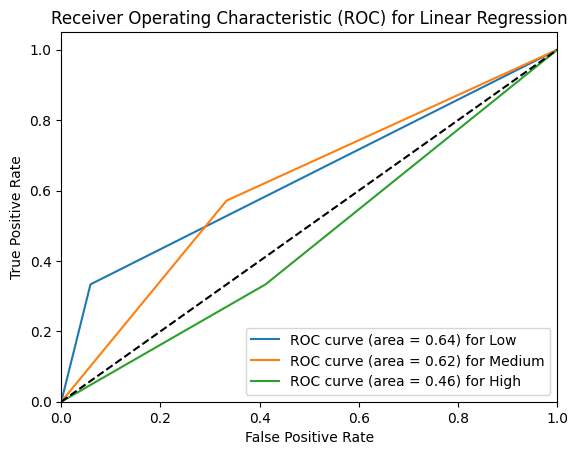

In [32]:
n_classes = 3  # Assuming 3 classes (Low, Medium, High)

# Compute ROC-AUC for each class
roc_auc = {}
fpr = {}
tpr = {}
thresholds = {}

class_names = ['Low', 'Medium','High']  # Replace with your actual class names

# Calculate ROC-AUC for each class and plot ROC curves
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_new[:,i], y_pred_new[:,i])
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_new[:,i], y_pred_new[:,i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Linear Regression')
plt.legend(loc="lower right")
plt.show()

In [33]:
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'Low', 'Medium'], dtype=object)